#### Data set cleaning
Dataset: _music_project_en.csv_  
Author: Luis Sergio Pastrana Lemus  
Date: 2025-04-23

## __1. Libraries__

In [1]:
from IPython.display import display, HTML
import os
import pandas as pd
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from whick the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "raw"
df_music = load_dataset_from_csv(data_file_path, "music_project_en.csv", sep=',', header='infer', keep_default_na=False)


##### `LSPL`

**Note:** `keep_default_na=False` is used to later convert missing values to `pd.NA`.  
This is beneficial because `pd.NA` provides:

- Consistency across data types  
- Type integrity preservation  
- Cleaner logical operations  
- Improved control over missing data

Since high performance or heavy computation is not required here, using `pd.NA` is appropriate.

In [3]:
# Format notebook output
format_notebook()

## __3. Data set cleaning__

In [4]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     65079 non-null  object
 2   artist    65079 non-null  object
 3   genre     65079 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


### 3.1. Standardizing String values using "snake case"

#### 3.1.1 Standardizing Column Labels

In [3]:
# Standardize column labels with snake_case format
df_music = normalize_columns_headers_format(df_music)
df_music.columns

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

#### 3.1.2 Standardizing Dataframe String values

In [6]:
# Standardize dataa frame string values with snake_case format
df_music = normalize_string_format(df_music, exclude=['userid', 'time'])
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
65074,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
65075,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hip,shelbyville,10:00:00,monday
65076,C5E3A0D5,jalopiina,,industrial,springfield,20:09:26,friday
65077,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


##### `LSPL`

**Note:** 

The column names and string values did not follow a consistent format; they contained spaces and capital letters, making them difficult to manipulate.

__Solution__: Column names and string values were standardized using lowercase letters, removing spaces, and applying the snake_case format.   
__Impact__: This facilitated data access and manipulation, improving readability and reducing errors in analysis.

### 3.2 Explicit duplicates

In [7]:
# Show explicit duplicates amount
display(HTML(f"> Explicit duplicates amount: <b>{df_music.duplicated().sum()}</b>"))

In [8]:
# Delete explicit duplicated rows
df_music = df_music.drop_duplicates().reset_index(drop=True)
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61253 entries, 0 to 61252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userid  61253 non-null  object
 1   track   61253 non-null  object
 2   artist  61253 non-null  object
 3   genre   61253 non-null  object
 4   city    61253 non-null  object
 5   time    61253 non-null  object
 6   day     61253 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


##### `LSPL`

**Note:** 

Duplicate rows were detected in the dataset.

__Solution__: Explicit duplicates were removed using the drop_duplicates() method.   
__Impact__: This prevented duplicates from affecting the analysis results.

### 3.2 Missing values

#### 3.2.1 Missing values check

In [9]:
# Show missing values
check_existing_missing_values(df_music)

#### 3.2.2 Replacing missing values (pd.NA)

In [10]:
# Replace missing values with pd.NA
df_music = replace_missing_values(df_music, exclude=['userid', 'city', 'time', 'day'])
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hip,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,<NA>,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


#### 3.2.3 Preview missing values

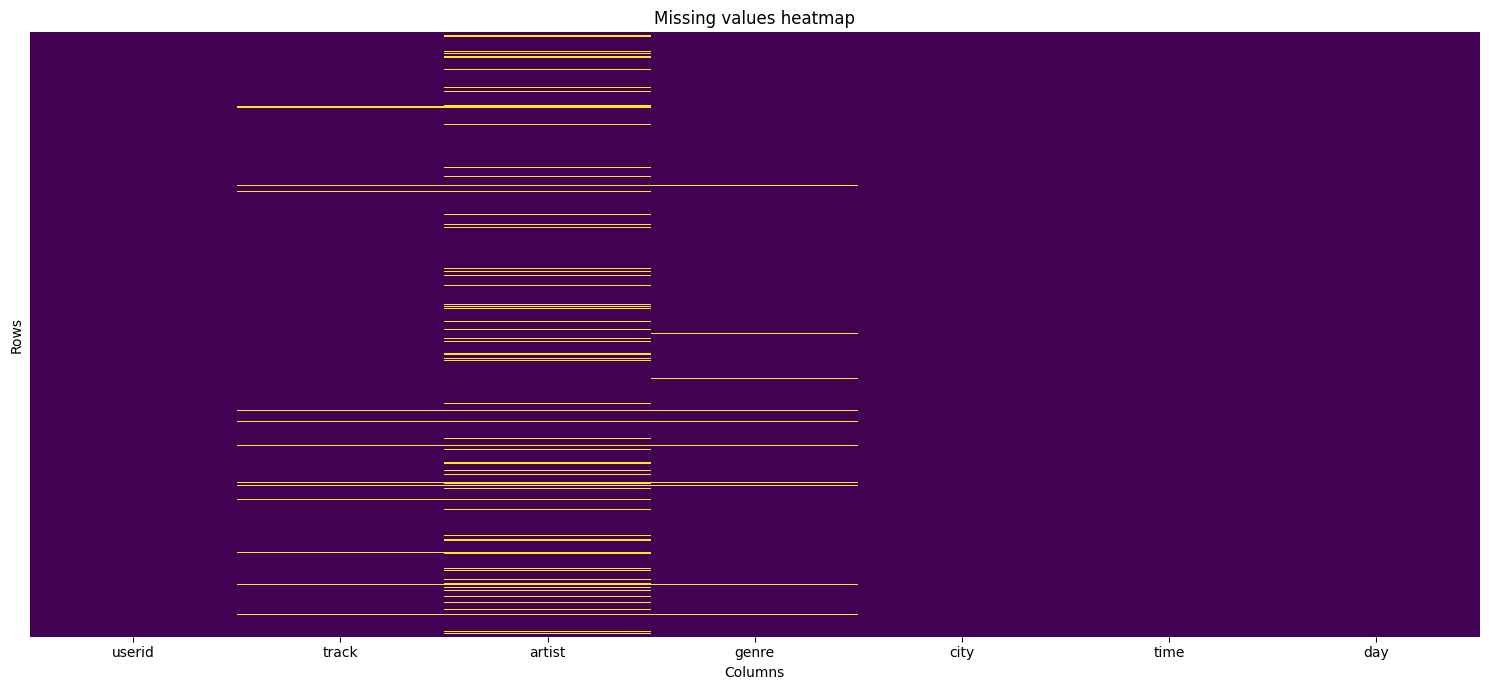

In [11]:
# Show missing values heatmap
missing_values_heatmap(df_music)

In [12]:
# Show pd.NA missing values for 'track' column
mask = df_music['track'].isna()
df_music.loc[mask, :]

,userid,track,artist,genre,city,time,day
15,E3C5756F,<NA>,<NA>,<NA>,springfield,09:24:51,monday
35,A8AE9169,<NA>,<NA>,<NA>,springfield,08:56:10,monday
161,364C85C0,<NA>,<NA>,<NA>,springfield,20:06:58,monday
210,C4990C90,<NA>,<NA>,<NA>,springfield,20:09:56,monday
216,22B27E80,<NA>,<NA>,<NA>,springfield,13:34:16,monday
...,...,...,...,...,...,...,...
61001,7D9627FD,<NA>,<NA>,<NA>,springfield,08:57:15,monday
61017,36CDD10A,<NA>,<NA>,folk,springfield,13:44:53,wednesday
61119,A8AE9169,<NA>,<NA>,<NA>,springfield,08:54:17,friday
61139,414F229D,<NA>,<NA>,<NA>,springfield,14:41:26,monday


In [13]:
# Show pd.NA missing values for 'artist' column
mask = df_music['artist'].isna()
df_music.loc[mask, :]

,userid,track,artist,genre,city,time,day
9,E772D5C0,pessimist,<NA>,dance,shelbyville,21:20:49,wednesday
15,E3C5756F,<NA>,<NA>,<NA>,springfield,09:24:51,monday
35,A8AE9169,<NA>,<NA>,<NA>,springfield,08:56:10,monday
40,77979A66,sci_fi,<NA>,rusrap,shelbyville,08:45:43,monday
54,3FA9A6A8,inside_out,<NA>,<NA>,springfield,10:00:41,friday
...,...,...,...,...,...,...,...
61202,83831D51,<NA>,<NA>,hip,shelbyville,20:15:36,friday
61203,356BE973,don_t_give_up_on_me,<NA>,dance,springfield,20:02:32,monday
61205,C8DD4A4,moscow_calling,<NA>,rusrock,springfield,13:27:33,monday
61219,57B3F0CE,intro,<NA>,rusrap,springfield,20:50:13,monday


In [14]:
# Show pd.NA missing values for 'genre' column
mask = df_music['genre'].isna()
df_music.loc[mask, :]

,userid,track,artist,genre,city,time,day
15,E3C5756F,<NA>,<NA>,<NA>,springfield,09:24:51,monday
35,A8AE9169,<NA>,<NA>,<NA>,springfield,08:56:10,monday
54,3FA9A6A8,inside_out,<NA>,<NA>,springfield,10:00:41,friday
161,364C85C0,<NA>,<NA>,<NA>,springfield,20:06:58,monday
182,4AFB623B,my_name_is_love,<NA>,<NA>,springfield,20:23:47,wednesday
...,...,...,...,...,...,...,...
60857,EED05948,<NA>,<NA>,<NA>,springfield,13:58:06,wednesday
61001,7D9627FD,<NA>,<NA>,<NA>,springfield,08:57:15,monday
61041,6E12D163,fantasy_boy,new_baccara,<NA>,springfield,20:51:44,friday
61119,A8AE9169,<NA>,<NA>,<NA>,springfield,08:54:17,friday


#### 3.2.4  Missing values data imputation

In [15]:
# Delete pd.NA missing values within 'track' and 'artist' columns
df_music = df_music.loc[~(df_music['track'].isna() & df_music['artist'].isna()), :]
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hip,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,<NA>,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


##### `LSPL`

**Note:** 

The analysis indicates that missing values in the 'track' column predominantly align with those in the 'artist' column. Since these rows lack essential information

__Solution__: Missing values ​​in both columns ['track', 'artist'] were deleted.   
__Impact__: This helped eliminate irrelevant values while retaining the meaningful data in the DataFrame..

In [16]:
# pd.NA missing values imputation with 'unknown'
df_music = df_music.fillna('unknown')
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hip,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


##### `LSPL`

**Note:** 

Null values ​​were found in the track, artist, and genre columns.

__Solution__: Missing values ​​in these columns were replaced with the string _'unknown'_.   
__Impact__: This helped maintain the integrity of the dataset and prevent errors during analysis.

### 3.3 Implicit duplicates

#### 3.3.1 Implicit duplicates check

In [17]:
# Show implicit duplicates
detect_implicit_duplicates(df_music, include=['genre'])

> Comparing column ['genre']: 100%|██████████| 268/268 [00:01<00:00, 187.59 values/s]


#### 3.3.2 Implicit duplicates data imputation

In [18]:
# Handling implicit duplicates for hop: triphop
artist_triphop = df_music.loc[(df_music['genre'] == 'triphop'), 'artist'].unique()

def trip_hop_genre(row):
    if row['genre'] == 'hop':
        if (row['artist'] in artist_triphop):
            return 'triphop'
        else:
            return 'hop'
    else:
        return row['genre']

df_music['genre'] = df_music.apply(trip_hop_genre, axis=1)

df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hip,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


In [19]:
# Handling implicit duplicates for hiphop: hip, hop, hip_hop
df_music['genre'] = df_music['genre'].replace({'hip': 'hiphop', 'hop': 'hiphop', 'hip_hop': 'hiphop'})
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hiphop,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


In [20]:
# Handling implicit duplicates for nu: nujazz, numetal
artist_nujazz = df_music.loc[(df_music['genre'] == 'nujazz'), 'artist'].unique()
artist_numetal = df_music.loc[(df_music['genre'] == 'numetal'), 'artist'].unique()
artist_disco = df_music.loc[(df_music['genre'] == 'disco'), 'artist'].unique()
artist_funk = df_music.loc[(df_music['genre'] == 'funk'), 'artist'].unique()

def nu_genre(row):
    if row['genre'] == 'nu':
        if (row['artist'] in artist_disco):
            return 'nudisco'
        elif (row['artist'] in artist_funk):
            return 'nufunk'
        elif (row['artist'] in artist_numetal):
            return 'numetal'
        elif (row['artist'] in artist_nujazz):
            return 'nujazz'
        else:
            return 'nu'
    else:
        return row['genre']

df_music['genre'] = df_music.apply(nu_genre, axis=1)

df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hiphop,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


In [21]:
# Handling implicit duplicates for tango: argentinetango
df_music.loc[(df_music['genre'] == 'argentinetango'), 'genre'] = 'tango'
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hiphop,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


In [22]:
# Handling implicit duplicates for latin: latino
df_music.loc[(df_music['genre'] == 'latino'), 'genre'] = 'latin'
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hiphop,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


##### `LSPL`

**Note:** 

Variants of the hip-hop genre (hip, hop, hip-hop), nu genre (nujazz, numetal, nudisco, nufunk), latino genre (latin), argentinetango (tango) were found.

__Solution__: A function was created to replace these variants with a single standard value or assigning correct genre.

__Impact__: This improved data consistency and allowed for more accurate analysis of music genres.


### 3.4 Casting to category data type

In [23]:
# Checking if chosen columns can be imputated to category dtype
display(HTML(f"> Amount of unique values for column ['<i>genre</i>']:\n"))
print(df_music['genre'].value_counts())
display(HTML(f"> Amount of unique values for column ['<i>city</i>']:\n"))
print(df_music['city'].value_counts())
print()
display(HTML(f"> Amount of unique values for column ['<i>day</i>']:\n"))
print(df_music['day'].value_counts())

genre
pop           8184
dance         6334
rock          5769
electronic    5518
hiphop        3020
              ... 
irish            1
mandopop         1
forró            1
dirty            1
regional         1
Name: count, Length: 264, dtype: int64


city
springfield    41873
shelbyville    18118
Name: count, dtype: int64



day
friday       21475
monday       20799
wednesday    17717
Name: count, dtype: int64


In [24]:
# Checking dtypes before imputation
display(HTML(f"> Data types before imputation:\n"))
print(df_music.loc[:, ['genre', 'city', 'day']].dtypes)

genre    object
city     object
day      object
dtype: object


In [25]:
# Casting to category dtype
df_music['genre'] = df_music['genre'].astype('category')
df_music['city'] = df_music['city'].astype('category')
df_music['day'] = df_music['day'].astype('category')

In [26]:
# Checking dtypes after imputation
display(HTML(f"> Data types after imputation:\n"))
print(df_music.loc[:, ['genre', 'city', 'day']].dtypes)

genre    category
city     category
day      category
dtype: object


### 3.5 Casting to datetime data type

In [27]:
df_music = normalize_datetime(df_music, include=["time"], frmt="%H:%M:%S")

## __4. Final cleaning dataframe review__

In [28]:
df_music

,userid,track,artist,genre,city,time,day
0,FFB692EC,kamigata_to_boots,the_mass_missile,rock,shelbyville,20:28:33,wednesday
1,55204538,delayed_because_of_accident,andreas_rönnberg,rock,springfield,14:07:09,friday
2,20EC38,funiculì_funiculà,mario_lanza,pop,shelbyville,20:58:07,wednesday
3,A3DD03C9,dragons_in_the_sunset,fire_ice,folk,shelbyville,08:37:09,monday
4,E2DC1FAE,soul_people,space_echo,dance,springfield,08:34:34,monday
...,...,...,...,...,...,...,...
61248,729CBB09,my_name,mclean,rnb,springfield,13:32:28,wednesday
61249,D08D4A55,maybe_one_day_feat_black_spade_,blu_exile,hiphop,shelbyville,10:00:00,monday
61250,C5E3A0D5,jalopiina,unknown,industrial,springfield,20:09:26,friday
61251,321D0506,freight_train,chas_mcdevitt,rock,springfield,21:43:59,friday


In [29]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59991 entries, 0 to 61252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   userid  59991 non-null  object  
 1   track   59991 non-null  object  
 2   artist  59991 non-null  object  
 3   genre   59991 non-null  category
 4   city    59991 non-null  category
 5   time    59991 non-null  object  
 6   day     59991 non-null  category
dtypes: category(3), object(4)
memory usage: 2.5+ MB


In [30]:
type(df_music['time'].iloc[0])

datetime.time

In [31]:
df_music = df_music.reset_index(drop=True)

In [32]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   userid  59991 non-null  object  
 1   track   59991 non-null  object  
 2   artist  59991 non-null  object  
 3   genre   59991 non-null  category
 4   city    59991 non-null  category
 5   time    59991 non-null  object  
 6   day     59991 non-null  category
dtypes: category(3), object(4)
memory usage: 2.1+ MB


## __5. Generate a new clean Data set .csv file__

In [33]:
project_root = Path.cwd().parent
processed_path = project_root / "data" / "processed" / "music_clean.csv"

df_music.to_csv(processed_path, index=False)